# Modelo estocástico para población de ganado vacuno de engorde

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

## Parámetros 

### Para variables normalmente distribuidas

<span style="color:red"> *muMsex, sigmaMsex:* </span>
media y desviación estándar del tiempo de madures sexual medido en meses

<span style="color:red"> *muTep, sigmaTep:* </span>
media y desviación estándar del tiempo del tiempo entre partos de una vaca

<span style="color:red"> *muNp, sigmaNp:* </span>
media y desviación estándar del tiempo del número de partos de una vaca. 
Se redondea a un numero entero no negativo

### Para variables binomiales
<span style="color:red"> *proH*  </span>: probabilidad de nacer hembra


In [2]:
muMsex, sigmaMsex = 23, 0.75
muTep, sigmaTep = 12, 0.5
muNp, sigmaNp = 10, 1
proH = 0.499

In [3]:
def desc():
    numP = int(np.random.normal(muNp, sigmaNp))
    mS = np.random.normal(muMsex, sigmaMsex)
    z = np.random.normal(muTep, sigmaTep,numP)
    sex = np.random.binomial(size=numP, n =1, p = 0.495)
    z = mS+np.cumsum(z)
    return [ [z[i], sex[i]] for i in range(numP)]


In [4]:
def trayectoria(x):
    ''' 
    Input x:   es la fecha de nacimieto de la vaca. 
    Output: [t, hembras, machos]: t es el tiempo de vida de la vaca, hembras y machos son listas 
    de fechas de nacimiento los decendientes terneros y terneras respecitvamente  
    ''' 
    ds = desc()
    machos = [ z[0] + x for z in ds if z[1]==0]
    hembras = [ z[0] + x for z in ds if z[1]==1]
    return [ds[-1][0], hembras, machos]

In [5]:
def descendientes(hmb):
    ''' 
    Input hmb:   lista de fechas de nacimiento de hembras. 
    Output: [tvida, hmb_des, mch_des]
    tvida:  lista del tiempo de vida de cada hembra en hmb, 
    hmb_des, mch_des: listas  de fechas de nacimiento de  terneros y terneras respecitvamente 
    descendientes del rebaño de hembras hmb
    '''
    aux = [trayectoria(x) for x in hmb]
    tvida =  [a[0] for a in aux]
    h_aux = [a[1] for a in aux]
    m_aux = [a[2] for a in aux]
    hmb_des = list(it.chain.from_iterable(h_aux))
    mch_des = list(it.chain.from_iterable(m_aux))
    return [tvida, hmb_des, mch_des]    

In [10]:
def nuevaG(l,h, m):
    z = descendientes(h)
    ll = l+ list(zip(h,z[0]))
    hh = z[1]
    mm  = m + z[2]
    return (ll,hh,mm)
    

In [15]:
def iterar(n):
    contador = 0
    z = trayectoria(0)
    hmb = z[1]
    mch = z[2]
    listaH = [(0, z[0])]
    while contador < n+ 1:
        tm = max(max(hmb), max(mch))
        listaH, hmb, mch = nuevaG(listaH, hmb, mch)
        listaH, hmb, mch = nuevaG(listaH, hmb, mch)
        contador = contador + 1   
    return (tm, listaH,  mch)

In [16]:
def filtro(t, lH,  M):
    LH = [ x for x in lH  if (x[0] + x[1] > t) & (x[0]< t)]
    MM = [ x for x in M if ((x + 24 > t) & (x < t))]
    return [LH,  MM]    

In [18]:
t, lH,  M = iterar(3)
t

984.8842619370578

In [19]:
t/12

82.07368849475482

In [20]:
def hato(s):
    w = filtro(s, lH, M)
    return  len(w[0]) 

In [23]:
ejex = np.linspace(0, t/2, 100)

In [27]:

ejey3 =[hato(s) for s in ejex ] 
#ejey1 =[hato(s) for s in ejex] 

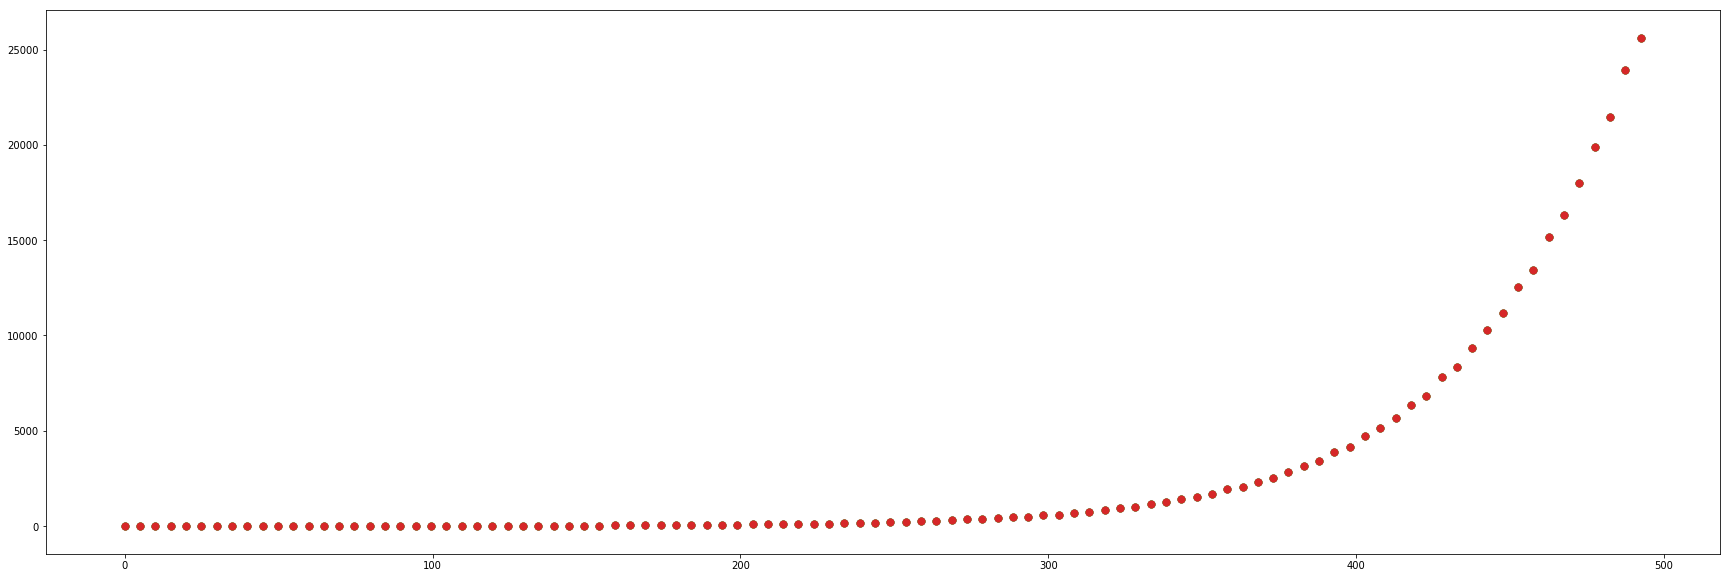

In [28]:

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.scatter(ejex, ejey0, lw = 2 )
ax.scatter(ejex, ejey1, lw = 2 )
ax.scatter(ejex, ejey2, lw = 2 )
ax.scatter(ejex, ejey3, lw = 2 )
#ax.scatter(ejex, ejey4, lw = 2 )
#ax.scatter(ejex, ejey5, lw = 2 )
plt.show()

In [ ]:
w[0]

In [ ]:
w[1]

In [ ]:
len(w[0])/len(w[1])

In [ ]:
def filtro(t, lH, H, M):
    tmax = t
    LH = [ x for x in lH  if (x[0] + x[1] > tmax) & (x[0]< tmax)]
    HH = [ x for x in H if ((x + 144 > tmax) & (x < tmax))]
    MM = [ x for x in M if ((x + 24 > tmax) & (x < tmax))]
    return [LH, HH,   MM]    

In [ ]:
t, lH, H, M = iterar(1)
filtro(t/2, lH, H, M)

In [ ]:
t

In [ ]:
z = trayectoria(0)
hmb = z[1]
mch = z[2]
listaH = [(0, z[0])]
tm = max(max(hmb), max(mch))
w = descendientes(hmb)
listaH = listaH + list(zip(hmb,w[0]))
hmb1 = hmb + w[1]
mch1 = mch + w[2]

In [ ]:
hmb

In [ ]:
hmb1

In [ ]:
w[0]

In [ ]:
listaH

In [ ]:
[w[1],w[0]]

In [ ]:
[hmb, w[2]]

In [ ]:
listaH

In [ ]:
m = iterar(0)

In [ ]:
m[0]

In [ ]:
m[1]

In [ ]:
m[2]

In [ ]:
z = trayectoria(0)
hmb = z[1]
mch = z[2]

In [ ]:
hmb

In [ ]:
mch

In [ ]:
w = descendientes(hmb)

In [ ]:
hmb+w[1]

In [ ]:
mch + w[2]

In [ ]:
z = trayectoria(0)
tmax = 0
hmb = [0]+ z[1] 
mch = z[2]
listaH = [(0, z[0])]
[len(hmb), len(mch)]
w = descendientes(hmb)
hmb = hmb + w[1]
mch = mch + w[2]

In [ ]:
[len(hmb), len(mch)]

In [ ]:
hmb

In [ ]:
tmax = z[0]
Hh = [ x for x in z[1] if (x[0] + x[1] > tmax) & (x[0]< tmax)]

In [ ]:
Hh

In [ ]:
z[2]

In [ ]:
 
tmax = z[0]/3
Hh = [ x for x in z[1] if (x[0] + x[1] > tmax) & (x[0]< tmax)]
Mm = [ x for x in z[3] if ((x + 24 > tmax) & (x < tmax))]
(tmax, len(Hh), len(Mm))

In [ ]:
z = iterar(0) 
tmax =  max([x[0] for x in z[0]])
Hh = [ x for x in z[0] if (x[0] + x[1] > tmax) & (x[0]< tmax)]
Mm = [ x for x in z[2] if ((x + 24 > tmax) & (x < tmax))]
(tmax, len(Hh), len(Mm))

In [ ]:
lista = z[0]
ejex = [x[0] for x in lista]
ejey = [x[1] for x in lista]
[max(ejex), max(ejey)]

In [ ]:
len(ejex)

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.scatter(ejex, ejey)
plt.show()

In [ ]:

z= trayectoria(0)
hmb = z[1]
mch  = z[2]
listaH = [(0, z[0])]
z = descendientes(hmb)
 

In [ ]:
z[0]

In [ ]:
def hato():
    k = 0
    hg0 = hijos(0.0)[1]
    z= descendientes(hg0)
    t10 = max(z[1][-1], z[2][-1])
    return(t10)
hato()   

In [ ]:
hmb = hijos(0.0)[1]
hmb = descendencia(hmb)[1]
z = descendencia(hmb)

In [ ]:
def suc(x):
    w = [[k[0]+x[0], x[1],k[1]] for k in desc()]
    a = w[0] 
    s = a[0] -x[0]
    w.append(  [x[0]+s, x[1]+s, 1]) 
    return w

In [ ]:
def hijos(lH):
    lst = [suc(x) for x in lH]
    return list(it.chain.from_iterable(lst))

In [ ]:
hijos([[50,30]])

In [ ]:
list(it.chain.from_iterable(A))

In [ ]:
x =[50,30]
w = [[k[0]+x[0], x[1],k[1]] for k in desc()]
l1 = len(w)
a = w[0] 
s = a[0] -x[0]
w.append(  [x[0]+s, x[1]+s, 1]) 
w

In [ ]:
w

In [ ]:
mS = np.random.normal(muMsex, sigmaMsex)
np.random.normal(muNp, sigmaNp) 
numP =  int(np.random.normal(muNp, sigmaNp))
z = np.random.normal(muTep, sigmaTep,numP)
sex = np.random.randint(2, size=numP)
z = mS+np.cumsum(z)
x = [5, 9, sex[0]]

In [ ]:
 w = [[z[j]+x[0], x[1], sex[j]] for j in range(numP)]

In [ ]:
w

In [ ]:
type(w)